# Assignment. Exploratory Data Analysis





In part 1 of this assignment, we will focus on exploratory data analysis of stock prices. Keep in mind, this assignment is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is challenging and you have to look things up on your own to try to solve the tasks issued. **
____
We'll focus on tech stocks and see how they progressed throughout the pandemic from the beginning of 2020 all the way to the end of Dec. 2020. You may look at other sectors as well in the end of this notebook, such as Airline companies and retail industry.

# Part 1


## Get the Data

In this section we will learn how to use pandas to directly read data from Yahoo finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**).*

### The Imports


In [1]:
#you need to install pandas datareader first. If you are using Canopy, you may comment out the first line. If you are using Anaconda, you may comment out the second line.
#!pip install pandas-datareader
#conda install -c anaconda pandas-datareader 
#!pip install --upgrade pandas
import pandas as pd
import numpy as np
pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import data, wb

import datetime
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following companies:
* Amazon
* Facebook
* Google
* Microsoft
* Twitter
* Apple


** Figure out how to get the stock data from Jan 1st 2020 to December 31st 2020 for each of these companies. Set each company to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each company.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/) for hints and instructions (it should just be a matter of replacing certain values. Use yahoo finance as a source, for example:**
    
    # Amazon
    Amazon = data.DataReader("AMZN", 'yahoo', start, end)

You may also use yfinance library explained in Method 2.

Thirdly, in case you want to use iex API, you may follow the steps here to register for an API token:https://algotrading101.com/learn/iex-api-guide/ 

The steps are basically:
1. register an account on https://iexcloud.io/console/
2. browse to the bottom, choose the "start free plan"
3. on the left you will see API_Tokens, and then generate your api tokens


# Method 1

In [2]:
start = datetime.datetime(2020, 1, 1)
end = datetime.datetime(2020, 12, 31)

In [3]:
# Amazon
Amazon = data.DataReader("AMZN", 'yahoo', start, end)

# Facebook
Facebook = data.DataReader("FB", 'yahoo', start, end)

# Google
Google = data.DataReader("GOOG", 'yahoo', start, end)

# Microsoft
Microsoft = data.DataReader("MSFT", 'yahoo', start, end)

# Twitter
Twitter = data.DataReader("TWTR", 'yahoo', start, end)

# Apple
Apple = data.DataReader("AAPL", 'yahoo', start, end)

In [4]:
Amazon.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,1898.010010,1864.150024,1875.000000,1898.010010,4029000,1898.010010
2020-01-03,1886.199951,1864.500000,1864.500000,1874.969971,3764400,1874.969971
2020-01-06,1903.689941,1860.000000,1860.000000,1902.880005,4061800,1902.880005
2020-01-07,1913.890015,1892.040039,1904.500000,1906.859985,4044900,1906.859985
2020-01-08,1911.000000,1886.439941,1898.040039,1891.969971,3508000,1891.969971


In [5]:
Amazon.reset_index(inplace=True)
Facebook.reset_index(inplace=True)
Google.reset_index(inplace=True)
Microsoft.reset_index(inplace=True)
Twitter.reset_index(inplace=True)
Apple.reset_index(inplace=True)

Amazon.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2020-01-02,1898.010010,1864.150024,1875.000000,1898.010010,4029000,1898.010010
1,2020-01-03,1886.199951,1864.500000,1864.500000,1874.969971,3764400,1874.969971
2,2020-01-06,1903.689941,1860.000000,1860.000000,1902.880005,4061800,1902.880005
3,2020-01-07,1913.890015,1892.040039,1904.500000,1906.859985,4044900,1906.859985
4,2020-01-08,1911.000000,1886.439941,1898.040039,1891.969971,3508000,1891.969971


# Method 2

In [ ]:
!pip install yfinance
import yfinance as yfin
yfin.pdr_override()


In [ ]:
AMZN = data.get_data_yahoo("AMZN", start=start, end=end)
AMZN.head()

In [ ]:
# Could also do this for a Panel Object
#df = data.DataReader(['AMZN', 'FB', 'GOOG', 'MSFT', 'TWTR', 'AAPL'],'yahoo', start, end)
#df.head

##### Add a Column_Company Name (this is filled out for you)

In [5]:
Amazon["Company"]='Amazon'
Facebook["Company"]='Facebook'
Microsoft["Company"]='Microsoft'
Twitter["Company"]='Twitter'
Apple["Company"]='Apple'
Google["Company"]='Google'

##### Draw the closing prices of Amazon

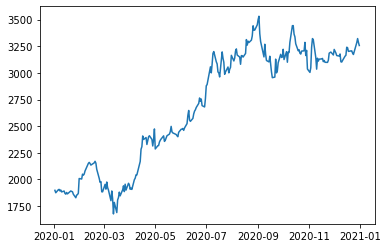

In [6]:
import matplotlib.pyplot as plt

plt.plot(Amazon["Close"])

##### Append all the data sets - these six tables

In [7]:
final_df = Amazon.append(Facebook).append(Microsoft).append(Twitter).append(Apple).append(Google)
final_df["Company"].nunique()

6

##### Derive the average closing price for each company

In [8]:
avg_closing_price_Amazon = Amazon["Close"].mean()
avg_closing_price_Facebook = Facebook["Close"].mean()
avg_closing_price_Microsoft = Microsoft["Close"].mean()
avg_closing_price_Twitter = Twitter["Close"].mean()
avg_closing_price_Apple = Apple["Close"].mean()
avg_closing_price_Google = Google["Close"].mean()

In [9]:
closing_price_list = [avg_closing_price_Amazon, avg_closing_price_Facebook, avg_closing_price_Microsoft, avg_closing_price_Twitter, avg_closing_price_Apple, avg_closing_price_Google]
print(closing_price_list)

[2680.8550957841835, 234.55086984747484, 193.02612642431447, 37.215770691279836, 95.34707487807444, 1481.4038110062068]


##### Plot the average closing price for each company using matplotlib or other visualization libraries.


<BarContainer object of 6 artists>

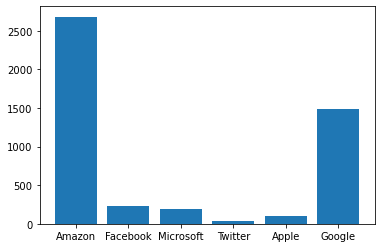

In [10]:
plt.bar(["Amazon","Facebook","Microsoft","Twitter","Apple","Google"],height=closing_price_list)


** What is the max Close price for each company's stock throughout the time period?**

In [11]:
max_closing_price_Amazon = Amazon["Close"].max()
max_closing_price_Facebook = Facebook["Close"].max()
max_closing_price_Microsoft = Microsoft["Close"].max()
max_closing_price_Twitter = Twitter["Close"].max()
max_closing_price_Apple = Apple["Close"].max()
max_closing_price_Google = Google["Close"].max()

** Create a new dataframe called returns. This dataframe will contain the returns for each company's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

** We can use pandas pct_change() method on the Close column to create a new dataframe representing this return value. Use .groupby().**

In [12]:
pd.set_option('display.max_rows', None)
returns = final_df.groupby(["Company"])["Close"].pct_change()

** Using this returns DataFrame, figure out on what dates each company stock had the best and worst single day returns. Did anything significant happen that day?**

In [13]:
Amazon_max=returns[0:253][returns[0:253]==returns[0:253].max()] #Amazon max
Amazon_min=returns[0:253][returns[0:253]==returns[0:253].min()] #Amazon min

Facebook_max=returns[253:506][returns[253:506]==returns[253:506].max()] #Facebook max
Facebook_min=returns[253:506][returns[253:506]==returns[253:506].min()] #Facebook min

Microsoft_max=returns[506:759][returns[506:759]==returns[506:759].max()] #Microsoft max
Microsoft_min=returns[506:759][returns[506:759]==returns[506:759].min()] #Microsoft min

Twitter_max=returns[759:1012][returns[759:1012]==returns[759:1012].max()] #Twitter max
Twitter_min=returns[759:1012][returns[759:1012]==returns[759:1012].min()] #Twitter min

Apple_max=returns[1012:1265][returns[1012:1265]==returns[1012:1265].max()] #Apple max
Apple_min=returns[1012:1265][returns[1012:1265]==returns[1012:1265].min()] #Apple min

Google_max=returns[1265:1518][returns[1265:1518]==returns[1265:1518].max()] #Google max
Google_min=returns[1265:1518][returns[1265:1518]==returns[1265:1518].min()] #Google min

print("Amazon")
print(Amazon_max)
print(Amazon_min)
print("\n")

print("Facebook")
print(Facebook_max)
print(Facebook_min)
print("\n")

print("Microsoft")
print(Microsoft_max)
print(Microsoft_min)
print("\n")

print("Twitter")
print(Twitter_max)
print(Twitter_min)
print("\n")

print("Apple")
print(Apple_max)
print(Apple_min)
print("\n")

print("Google")
print(Google_max)
print(Google_min)
print("\n")

Amazon
Date
2020-07-20    0.079295
Name: Close, dtype: float64
Date
2020-03-12   -0.079221
Name: Close, dtype: float64


Facebook
Date
2020-03-13    0.10235
Name: Close, dtype: float64
Date
2020-03-16   -0.14253
Name: Close, dtype: float64


Microsoft
Date
2020-03-13    0.142169
Name: Close, dtype: float64
Date
2020-03-16   -0.14739
Name: Close, dtype: float64


Twitter
Date
2020-02-06    0.150344
Name: Close, dtype: float64
Date
2020-10-30   -0.211139
Name: Close, dtype: float64


Apple
Date
2020-03-13    0.119808
Name: Close, dtype: float64
Date
2020-03-16   -0.128647
Name: Close, dtype: float64


Google
Date
2020-03-13    0.094017
Name: Close, dtype: float64
Date
2020-03-16   -0.111008
Name: Close, dtype: float64




** Please state here what you have noticed. Did anything significant happen in that time frame? **

It can be noticed that Facebook, Microsoft, Apple and Google had their best single day returns on 13th March 2020. This was the day that the President of the United States declared a National Emergency concerning the Novel Coronavirus Disease Outbreak.

It can be noticed that Google, Apple, Microsoft and Facebook had their worst single day return on 16th March 2020. This was the day that the Dow Jones Industrial Average fell by 2,997.10, the single largest point drop in history and the second-largest percentage drop ever.

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? **

In [14]:
Amazon_stddev=returns[0:253].std()

Facebook_stddev=returns[253:506].std() 

Microsoft_stddev=returns[506:759].std()

Twitter_stddev=returns[759:1012].std()

Apple_stddev=returns[1012:1265].std()

Google_stddev=returns[1265:1518].std()

list_of_std_devs = [Amazon_stddev,Facebook_stddev,Microsoft_stddev,Twitter_stddev,Apple_stddev,Google_stddev]

max(list_of_std_devs)

0.038996215467204984

Twitter has the highest standard deviation and thus is the riskiest over the entire time period

** Which company would you classify as the most profitable for the year 2020? **

In [16]:
print("Amazon\n")
print(str((Amazon["Close"][252]-Amazon["Close"][0])/Amazon["Close"][0]))
print("\n")
print("Facebook\n")
print(str((Facebook["Close"][252]-Facebook["Close"][0])/Facebook["Close"][0]))
print("\n")
print("Microsoft\n")
print(str((Microsoft["Close"][252]-Microsoft["Close"][0])/Microsoft["Close"][0]))
print("\n")
print("Twitter\n")
print(str((Twitter["Close"][252]-Twitter["Close"][0])/Twitter["Close"][0]))
print("\n")
print("Apple\n")
print(str((Apple["Close"][252]-Apple["Close"][0])/Apple["Close"][0]))
print("\n")
print("Google\n")
print(str((Google["Close"][252]-Google["Close"][0])/Google["Close"][0]))
print("\n")

Amazon

0.7159708931370734


Facebook

0.3021260618343919


Microsoft

0.3847590893441932


Twitter

0.6764706750750628


Apple

0.7671383352084853


Google

0.28120407142082376




When we take the difference between the first and last closing prices and divide it by the first closing price, we see that the value is the highest for Apple, so it is the most profitable company for the year 2020.

** Create a density plot using any library you like to visualize the previous year's return for each company **

E:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Amazon')

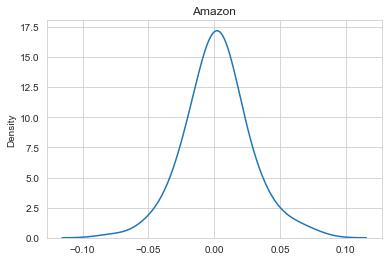

In [17]:
import seaborn as sns

sns.set_style('whitegrid')
sns.kdeplot(np.array(returns[0:253]), bw=0.5).set_title('Amazon')


E:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Facebook')

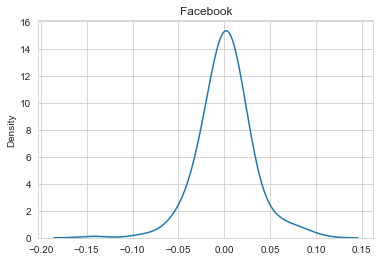

In [18]:
sns.kdeplot(np.array(returns[253:506]), bw=0.5).set_title('Facebook')

E:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Microsoft')

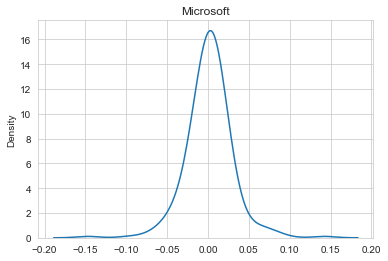

In [19]:
sns.kdeplot(np.array(returns[506:759]), bw=0.5).set_title('Microsoft')


E:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Twitter')

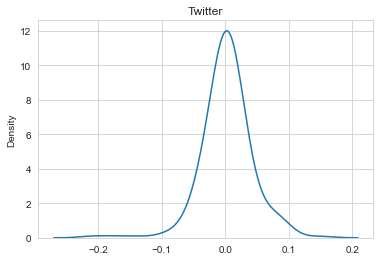

In [20]:
sns.kdeplot(np.array(returns[759:1012]), bw=0.5).set_title('Twitter')


E:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Apple')

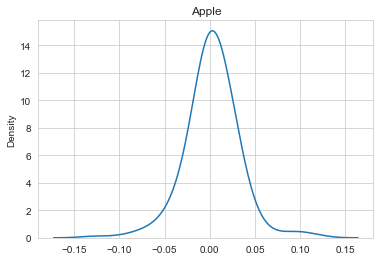

In [21]:
sns.kdeplot(np.array(returns[1012:1265]), bw=0.5).set_title('Apple')


E:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Google')

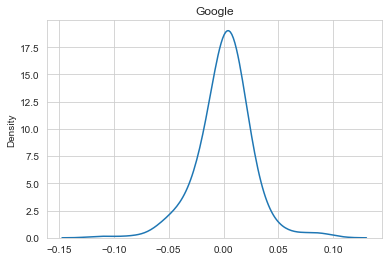

In [22]:
sns.kdeplot(np.array(returns[1265:1518]), bw=0.5).set_title('Google')

### Moving Averages

** Please derive the moving averages for these stocks in the year 2020. Use .rolling() in pandas to get the rolling average calculation. ** 



In [23]:
Amazon['MA30'] = Amazon['Close'].rolling(30).mean()
Facebook['MA30'] = Facebook['Close'].rolling(30).mean()
Microsoft['MA30'] = Microsoft['Close'].rolling(30).mean()
Twitter['MA30'] = Twitter['Close'].rolling(30).mean()
Apple['MA30'] = Apple['Close'].rolling(30).mean()
Google['MA30'] = Google['Close'].rolling(30).mean()


In [24]:
Apple.head(30)

,High,Low,Open,Close,Volume,Adj Close,Company,MA30
Date,,,,,,,,
2020-01-02,75.150002,73.797501,74.059998,75.087502,135480400.0,74.096458,Apple,NaN
2020-01-03,75.144997,74.125000,74.287498,74.357498,146322800.0,73.376083,Apple,NaN
2020-01-06,74.989998,73.187500,73.447502,74.949997,118387200.0,73.960770,Apple,NaN
2020-01-07,75.224998,74.370003,74.959999,74.597504,108872000.0,73.612923,Apple,NaN
2020-01-08,76.110001,74.290001,74.290001,75.797501,132079200.0,74.797081,Apple,NaN
2020-01-09,77.607498,76.550003,76.809998,77.407501,170108400.0,76.385834,Apple,NaN
2020-01-10,78.167503,77.062500,77.650002,77.582497,140644800.0,76.558517,Apple,NaN
2020-01-13,79.267502,77.787498,77.910004,79.239998,121532000.0,78.194138,Apple,NaN
2020-01-14,79.392502,78.042503,79.175003,78.169998,161954400.0,77.138268,Apple,NaN


** Plot the rolling 30 day average against the Close Price for Apple's stock for the year 2020**

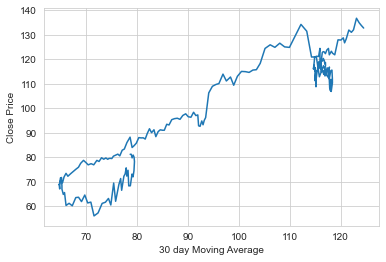

In [38]:
plt.plot(Apple.iloc[:,Apple.columns.get_loc("MA30")],Apple.iloc[:,Apple.columns.get_loc("Close")])
plt.xlabel("30 day Moving Average")
plt.ylabel("Close Price")

plt.show()

** Create a heatmap of the correlation between the stocks Close Price.**


In [27]:
Amazon.reset_index(inplace=True)
Facebook.reset_index(inplace=True)
Google.reset_index(inplace=True)
Microsoft.reset_index(inplace=True)
Twitter.reset_index(inplace=True)
Apple.reset_index(inplace=True)

final_df = Amazon.append(Facebook).append(Microsoft).append(Twitter).append(Apple).append(Google)

In [28]:
df_pivot = final_df.pivot('Date','Company','Close').reset_index()
df_pivot.head()

Company,Date,Amazon,Apple,Facebook,Google,Microsoft,Twitter
0,2020-01-02,1898.010010,75.087502,209.779999,1367.369995,160.619995,32.299999
1,2020-01-03,1874.969971,74.357498,208.669998,1360.660034,158.619995,31.520000
2,2020-01-06,1902.880005,74.949997,212.600006,1394.209961,159.029999,31.639999
3,2020-01-07,1906.859985,74.597504,213.059998,1393.339966,157.580002,32.540001
4,2020-01-08,1891.969971,75.797501,215.220001,1404.319946,160.089996,33.049999


In [29]:
corr_df = df_pivot.corr(method='pearson')
corr_df.head().reset_index()
corr_df.head(10)

Company,Amazon,Apple,Facebook,Google,Microsoft,Twitter
Company,,,,,,
Amazon,1.000000,0.920808,0.890986,0.744437,0.962087,0.738880
Apple,0.920808,1.000000,0.949011,0.867947,0.930717,0.891230
Facebook,0.890986,0.949011,1.000000,0.906255,0.928479,0.842421
Google,0.744437,0.867947,0.906255,1.000000,0.842274,0.857050
Microsoft,0.962087,0.930717,0.928479,0.842274,1.000000,0.790271
Twitter,0.738880,0.891230,0.842421,0.857050,0.790271,1.000000


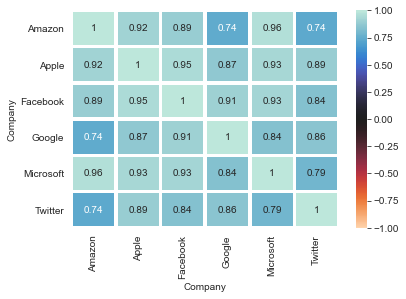

In [39]:
sns.heatmap(corr_df, cmap='icefire_r',annot=True, vmax=1.0, vmin=-1.0 , linewidths=2.5)

plt.yticks(rotation=0) 
plt.xticks(rotation=90) 
plt.show()

# Part 2. 

Please generate some visualization and analyze some stocks in other industries (you can pick a couple). For instancd, you may analyze how stocks have been doing this year in the airline industry, retail industry, service industry and so forth. Feel free to use any plotting packages (in Python), and generate any types of figures. You may also comment on the generated figures, and explain any insights you have obtained. If you have some background knowlege in financial services, please feel free to apply them.

In [54]:
airline_list = ["DAL","LUV","UAL","AAL"]
retail_list = ["WMT","SHOP","COST","ROST"]
tech_list = ['AAPL','GOOGL','MSFT','AMZN']

closingprice_df_tech = data.DataReader(tech_list, 'yahoo', start, end)['Close']
closingprice_df_retail = data.DataReader(retail_list, 'yahoo', start, end)['Close']
closingprice_df_airline = data.DataReader(airline_list, 'yahoo', start, end)['Close']

I decided to make 3 lists representing 3 different industries :- the airline industry, the retail industry and the tech industry. I then populated the lists with 4 representatives.

In [59]:
returns_tech = closingprice_df_tech.pct_change()
returns_retail = closingprice_df_retail.pct_change()
returns_airline = closingprice_df_airline.pct_change()

For the tech industry I calculated the risk for each stock in the list, represented by the standard deviation of the returns and then I calculated the expected returns, represented by the mean of the returns and then plotted them in a graph.

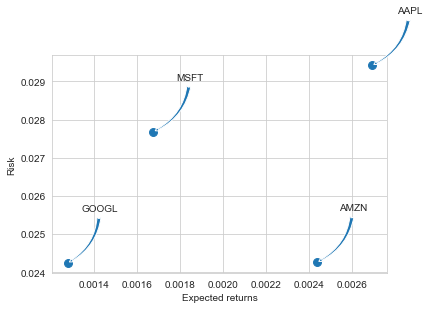

In [56]:
area = np.pi*20

plt.scatter(returns_tech.mean(),returns_tech.std(),s=area)

plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(returns_tech.columns, returns_tech.mean(), returns_tech.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = 'fancy', connectionstyle = 'arc3,rad=-0.3'))

For the tech industries we can see that Apple has the highest expected returns but also has the most risk. On the other hand, Amazon has the second most expected returns but has much less risk.

For the retail industry I calculated the risk for each stock in the list, represented by the standard deviation of the returns and then I calculated the expected returns, represented by the mean of the returns and then plotted them in a graph.

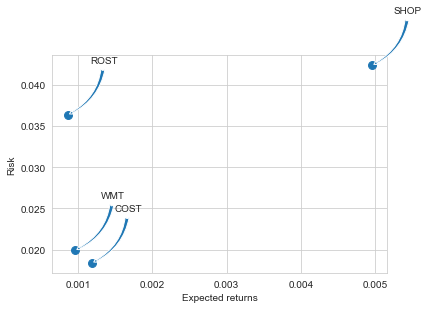

In [57]:
area = np.pi*20

plt.scatter(returns_retail.mean(),returns_retail.std(),s=area)

plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(returns_retail.columns, returns_retail.mean(), returns_retail.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = 'fancy', connectionstyle = 'arc3,rad=-0.3'))

For the retail industries, we can see that Shopify has the highest expected returns but also the most risk. Walmart and Costco have got the least expected returns and risk.
Also we can see the retail stocks are not as good as the tech stocks but are better than the airline stocks.

For the airline industry I calculated the risk for each stock in the list, represented by the standard deviation of the returns and then I calculated the expected returns, represented by the mean of the returns and then plotted them in a graph.

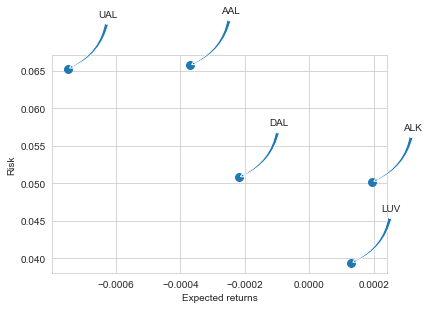

In [58]:
area = np.pi*20

plt.scatter(returns_airline.mean(),returns_airline.std(),s=area)

plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(returns_airline.columns, returns_airline.mean(), returns_airline.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = 'fancy', connectionstyle = 'arc3,rad=-0.3'))

For the airline industry, we can see that the entities do not have as high a expected return as the other 2 industries. Only LUV(Southwest Airlines Co) and ALK(Alaska Air Group, Inc.) have positive expected returns and all have much higher risk coefficients compared to the retail or tech industries. Among them, LUV seems to be the best option.

# Great Job!
